In [7]:
# setup shits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


For this particular one:

- Femur is on upper arm

- Tibia is forearm

In [6]:
femur_raw = pd.read_csv('xsens_quaternion/arm_angle_test/upper_arm_stable.csv', skiprows=10)
tibia_raw = pd.read_csv('xsens_quaternion/arm_angle_test/forearm_stable.csv', skiprows=10)
femur_raw.columns = [i+"_femur" for i in femur_raw.columns]
tibia_raw.columns = [i+"_tibia" for i in tibia_raw.columns]
print(femur_raw.columns)

Index(['PacketCounter_femur_femur', 'SampleTimeFine_femur_femur',
       'Euler_X_femur_femur', 'Euler_Y_femur_femur', 'Euler_Z_femur_femur',
       'FreeAcc_X_femur_femur', 'FreeAcc_Y_femur_femur',
       'FreeAcc_Z_femur_femur'],
      dtype='object')


In [3]:
combined_raw = femur_raw.merge(tibia_raw, how='outer', left_on='SampleTimeFine_femur', right_on='SampleTimeFine_tibia')
# print(combined_raw.head(40))
print(combined_raw.tail(1))
combined_raw.dropna(inplace=True)
print(combined_raw.tail(1))
combined_raw.to_csv('./xsens_quaternion/arm_angle_test/combined_raw_stable.csv', index=False)

      PacketCounter_femur  SampleTimeFine_femur  Quat_W_femur  Quat_X_femur  \
2034                  NaN                   NaN           NaN           NaN   

      Quat_Y_femur  Quat_Z_femur  FreeAcc_X_femur  FreeAcc_Y_femur  \
2034           NaN           NaN              NaN              NaN   

      FreeAcc_Z_femur  PacketCounter_tibia  SampleTimeFine_tibia  \
2034              NaN                  1.0           113455742.0   

      Quat_W_tibia  Quat_X_tibia  Quat_Y_tibia  Quat_Z_tibia  FreeAcc_X_tibia  \
2034      0.785144      0.029406     -0.138681       0.60287         0.026794   

      FreeAcc_Y_tibia  FreeAcc_Z_tibia  
2034         0.205633         0.056549  
      PacketCounter_femur  SampleTimeFine_femur  Quat_W_femur  Quat_X_femur  \
2032               2033.0           147339753.0      0.726851      0.217184   

      Quat_Y_femur  Quat_Z_femur  FreeAcc_X_femur  FreeAcc_Y_femur  \
2032     -0.338208      0.556898         0.001191         0.096969   

      FreeAcc_Z_fe

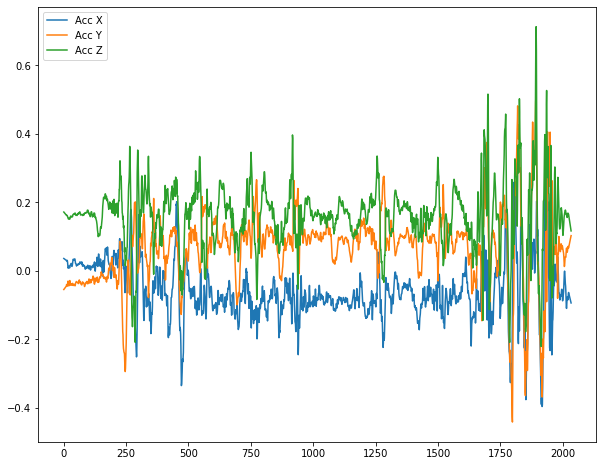

,PacketCounter_femur,SampleTimeFine_femur,Quat_W_femur,Quat_X_femur,Quat_Y_femur,Quat_Z_femur,FreeAcc_X_femur,FreeAcc_Y_femur,FreeAcc_Z_femur,PacketCounter_tibia,SampleTimeFine_tibia,Quat_W_tibia,Quat_X_tibia,Quat_Y_tibia,Quat_Z_tibia,FreeAcc_X_tibia,FreeAcc_Y_tibia,FreeAcc_Z_tibia
0,1.0,113472409.0,0.687408,0.203372,-0.389746,0.578108,0.122873,-0.084339,0.196434,2.0,113472409.0,0.785170,0.029340,-0.138711,0.602832,-0.048266,0.234267,0.079360
1,2.0,113489076.0,0.687447,0.203500,-0.389681,0.578060,0.059330,-0.053126,0.159858,3.0,113489076.0,0.785170,0.029194,-0.138784,0.602823,-0.063349,0.212465,0.092641
2,3.0,113505743.0,0.687529,0.203566,-0.389643,0.577965,-0.041819,-0.020403,0.160625,4.0,113505743.0,0.785310,0.029064,-0.138856,0.602629,-0.027977,0.208393,0.121391
3,4.0,113522410.0,0.687608,0.203555,-0.389661,0.577863,-0.050975,-0.034225,0.172697,5.0,113522410.0,0.785433,0.028936,-0.138893,0.602467,0.046147,0.201529,0.115467
4,5.0,113539077.0,0.687680,0.203501,-0.389737,0.577744,0.010453,-0.065770,0.162202,6.0,113539077.0,0.785649,0.028906,-0.138863,0.602194,0.066717,0.131070,0.088097
5,6.0,113555744.0,0.687732,0.203470,-0.389838,0.577625,0.067125,-0.099157,0.154224,7.0,113555744.0,0.785653,0.028909,-0.138845,0.602193,0.042554,0.158782,0.037277
6,7.0,113572411.0,0.687749,0.203526,-0.389846,0.577579,0.105512,-0.097338,0.181831,8.0,113572411.0,0.785730,0.028938,-0.138838,0.602093,0.013592,0.181435,0.067432
7,8.0,113589078.0,0.687768,0.203709,-0.389719,0.577578,0.029248,-0.029814,0.183356,9.0,113589078.0,0.785748,0.028970,-0.138824,0.602071,-0.004277,0.205734,0.089670
8,9.0,113605745.0,0.687802,0.203867,-0.389593,0.577567,-0.011873,0.038245,0.162894,10.0,113605745.0,0.785736,0.029081,-0.138770,0.602093,-0.001231,0.255463,0.117306
9,10.0,113622412.0,0.687866,0.203937,-0.389530,0.577509,0.011444,0.047840,0.167253,11.0,113622412.0,0.785788,0.029224,-0.138632,0.602050,0.045090,0.279347,0.145163


In [8]:
from scipy.signal import savgol_filter

combined_raw = pd.read_csv('xsens_quaternion/arm_angle_test/combined_raw_stable.csv')

combined_filter = combined_raw.copy()

for i in combined_filter.columns:
    combined_filter[i] = savgol_filter(combined_filter[i], 21, 1)
    
plt.plot(combined_filter['PacketCounter_femur'], combined_filter['FreeAcc_X_femur'], label = 'Acc X')
plt.plot(combined_filter['PacketCounter_femur'], combined_filter['FreeAcc_Y_femur'], label = 'Acc Y')
plt.plot(combined_filter['PacketCounter_femur'], combined_filter['FreeAcc_Z_femur'], label = 'Acc Z')
plt.legend()
plt.show()

combined_raw.head(10)

[137.08570000817542, 137.38743689109097, 137.68879289415273, 137.98974512444866, 138.29027079509805, 138.59034722005617, 138.88995180858538, 139.18906205940038, 139.48765555449452, 139.78570995265483, 140.08320298267333, 139.78974346262476, 139.44130109577614, 139.45191949119396, 140.05458706389385, 141.36202495260724, 142.32372463071798, 143.24531599037468, 144.0409359269289, 144.55509681175224, 144.55846710521328, 144.24703150327136, 144.18751989243358, 144.19615652868828, 144.2023178915137, 143.05697497985088, 141.86109655208526, 140.77112653473387, 140.75869254509087, 140.96417166847135, 140.53953647229827, 140.15787895627335, 140.639093902912, 141.14735992829873, 141.34652669729525, 140.80180463926183, 139.52985246402883, 138.40001091593416, 137.6691320909616, 137.37943043151242, 136.74392278374978, 137.00126336714604, 136.97183140106628, 136.28009806570455, 135.87101614140835, 135.75439310464617, 136.20771590321732, 137.28499345952326, 138.85484234875386, 138.904600170757, 138.40

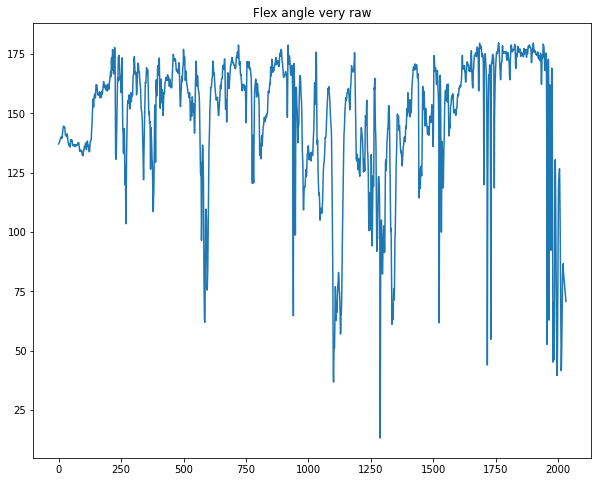

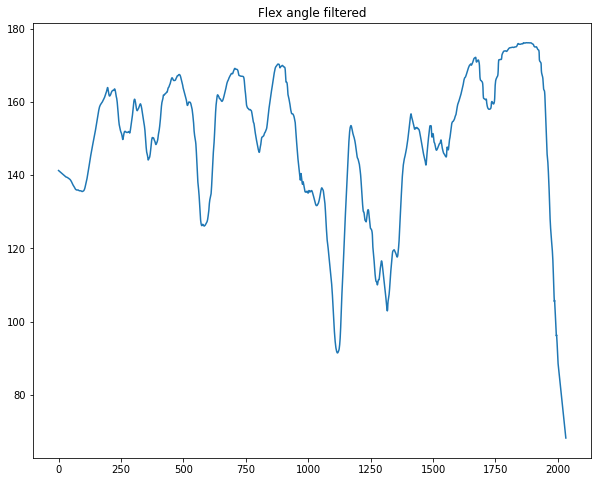

In [14]:
import numpy as np

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

dot_prod = []

for row in range(len(combined_filter)):
    data_row = combined_filter.iloc[row]
    femur_vec = np.array([data_row['FreeAcc_X_femur'], data_row['FreeAcc_Y_femur'], data_row['FreeAcc_Z_femur']])
    tibia_vec = np.array([data_row['FreeAcc_X_tibia'], data_row['FreeAcc_Y_tibia'], data_row['FreeAcc_Z_tibia']])
    
    dot_prod.append(angle_between(femur_vec-tibia_vec, tibia_vec))
    
    
flex_angle = [np.rad2deg(i) for i in dot_prod]
print(flex_angle)

plt.plot(flex_angle)
plt.title("Flex angle very raw")
plt.show()

flex_angle_filter = savgol_filter(flex_angle, 61, 1)
plt.plot(flex_angle_filter)
plt.title("Flex angle filtered")
plt.show()